In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
from sim.LoadBalancer import LoadBalancer
from sim.Source import Source, QuadraticArrivalSchedule, sigmoid
from sim.Environment import Environment
from sim.GELoadBalancer import GreedyEpsilonLoadBalancerContextSampling
from sklearn.ensemble import RandomForestRegressor
from optServers import getOptServer



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

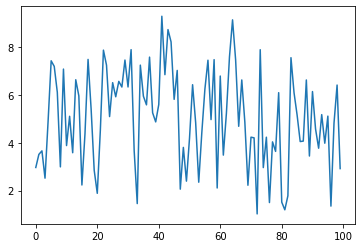

In [89]:
A,B = None,None
linear = True

if not linear:
    A = np.random.uniform(0,0.5,(6,6))
    B = np.random.uniform(0,0.5,(6,6))
else:    
    A = np.random.uniform(0,1,1)
    B = np.random.uniform(0,1,1)

mu = np.array([0]) #for mv normal
cov = np.diag([1]) #for mv normal
arrs  = []
T = 100 
max_arrivals = 10
xs = [np.random.multivariate_normal(mu, cov)]
for i in range(T):
    x = np.random.multivariate_normal(mu, cov)
    if not linear:
        arr = sigmoid(x.T@A@x) * max_arrivals #quadraric
    else:
        arr = sigmoid(x@A + xs[-1] @ B) * max_arrivals #linear
    arrs.append(arr)
    xs.append(x)
plt.plot(arrs)

In [120]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor

stopTime = 1*24*60*60
env = Environment(stopTime=stopTime)
model  = RandomForestRegressor(n_estimators=10)
eta = lambda t: sigmoid(2-0.01*t)
periodLength = 0.5*60*60 #half an hour per period -> schedule repeated two times in 12 hours
loadBalancer = GreedyEpsilonLoadBalancerContextSampling(nServers=20, environment=env, model = model, eta=eta, nServerRange=[1,45], usePartialFit=False, periodLength=periodLength)
source = Source(arrivalsPerSecond=10, requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)],environment=env, loadBalancer=loadBalancer) #(prob, mu, sigma, cancelTime)
arrivalSchedule = QuadraticArrivalSchedule(periodLength=periodLength,environment=env,source=source,loadBalancer=loadBalancer,maxArrivals=20)
env.run(debug=False)

18061 0 20 15061.0
7
17925 1037 7 6505.0
nan
(1, 2) (1, 1)
15


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


18473 159 15 14633.0
0.74
(2, 2) (2, 1)
8


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17732 937 8 7162.0
0.750156914609942
(3, 2) (3, 1)
25


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18067 8 25 14237.0
0.8570487424893882
(4, 2) (4, 1)
23


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17706 0.0 23 14256.0
0.8455220774988461
(5, 2) (5, 1)
Max reward for 12066.1 16
16


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18174 14 16 15634.0
0.8967893566394621
(6, 2) (6, 1)
38


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17567 0.0 38 11867.0
0.9285863866870486
(7, 2) (7, 1)
7


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17793 941 7 7333.0
0.988952749127801
(8, 2) (8, 1)
19


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18304 9 19 15364.0
0.9841942894245387
(9, 2) (9, 1)
23


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19323 0.0 23 15873.0
0.9720019505832734
(10, 2) (10, 1)
Max reward for 12154.7 14
14


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17825 300 14 12725.0
0.9816417767147074
(11, 2) (11, 1)
14


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18186 358 14 12506.0
0.9677463516579756
(12, 2) (12, 1)
Max reward for 14532.5 16
16


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17997 23 16 15367.0
0.9869487132374193
(13, 2) (13, 1)
Max reward for 14102.0 16
16


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18094 14 16 15554.0
0.9693887313655524
(14, 2) (14, 1)
1


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18015 2589 1 -8025.0
0.8843001898635088
(15, 2) (15, 1)
Max reward for 14406.3 16
16


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18206 18 16 15626.0
0.9855112226312387
(16, 2) (16, 1)
36


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18373 0.0 36 12973.0
0.9616451360139594
(17, 2) (17, 1)
2


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18197 2337 2 -5473.0
0.9873663988068833
(18, 2) (18, 1)
34


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18603 0.0 34 13503.0
0.9521657291344225
(19, 2) (19, 1)
17


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17890 0.0 17 15340.0
0.9932311254503413
(20, 2) (20, 1)
44


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18001 0.0 44 11401.0
0.9845250848453666
(21, 2) (21, 1)
13


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17881 534 13 10591.0
0.9675856293634922
(22, 2) (22, 1)
19


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17133 12 19 14163.0
0.9873032089204862
(23, 2) (23, 1)
42


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18008 0.0 42 11708.0
0.990238933893057
(24, 2) (24, 1)
25


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17502 0.0 25 13752.0
0.9427069678716448
(25, 2) (25, 1)
24


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18772 0.0 24 15172.0
0.9919121018347951
(26, 2) (26, 1)
16


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18209 14 16 15669.0
0.9694325922908981
(27, 2) (27, 1)
6


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18212 1592 6 1392.0
0.9733794533708872
(28, 2) (28, 1)
24


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18580 11 24 14870.0
0.983233007927845
(29, 2) (29, 1)
31


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17738 0.0 31 13088.0
0.9818249050906338
(30, 2) (30, 1)
33


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18086 0.0 33 13136.0
0.9918547197657096
(31, 2) (31, 1)
6


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18139 1660 6 639.0
0.9718801359307562
(32, 2) (32, 1)
19


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17783 0.0 19 14933.0
0.9387332656061614
(33, 2) (33, 1)


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 11682.5 16
16
18020 13 16 15490.0
0.978754007904125
(34, 2) (34, 1)
17


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18319 0.0 17 15769.0
0.9905173629331294
(35, 2) (35, 1)
8


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18196 810 8 8896.0
0.9754728658331436
(36, 2) (36, 1)
39


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17774 0.0 39 11924.0
0.9791463142650405
(37, 2) (37, 1)
4


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17641 1811 4 -1069.0
0.9834759634448952
(38, 2) (38, 1)
44


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18502 3 44 11872.0
0.9937121702044791
(39, 2) (39, 1)
8


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18472 909 8 8182.0
0.991165372080466
(40, 2) (40, 1)
23


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17583 14 23 13993.0
0.9956456956852493
(41, 2) (41, 1)
42


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18115 0.0 42 11815.0
0.9936325836729878
(42, 2) (42, 1)
8


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19067 744 8 10427.0
0.9908389115551419
(43, 2) (43, 1)
Max reward for 11484.0 19
19


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17741 0.0 19 14891.0
0.9918299976048106
(44, 2) (44, 1)
42


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18368 0.0 42 12068.0
0.9872485666464782
(45, 2) (45, 1)
5


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17889 1378 5 3359.0
0.9896685176193118
(46, 2) (46, 1)
36


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17811 0.0 36 12411.0
0.9634683750994298
(47, 2) (47, 1)
28


../sim/GELoadBalancer.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


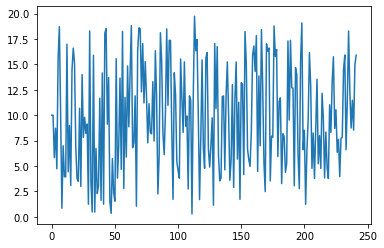

In [95]:
plt.plot(env.log['arrivalsPerSecond'])

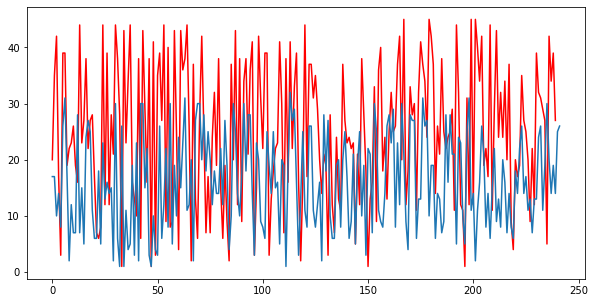

In [96]:
plt.figure(figsize=(10,5))
plt.plot(env.log['numberOfServers'][::2], color='red',)
plt.plot([getOptServer(_) for _ in env.log['arrivalsPerSecond']])

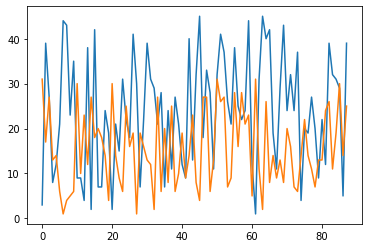

In [97]:
real = np.array([getOptServer(_) for _ in env.log['arrivalsPerSecond'][2:]])
pred = np.array(env.log['numberOfServers'][::2])
ged = np.array(env.log['greedyEpsilonActionType'])
plt.plot(pred[ged==1])
plt.plot(real[ged==1])

[autoreload of sim.Source failed: Traceback (most recent call last):
  File "/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


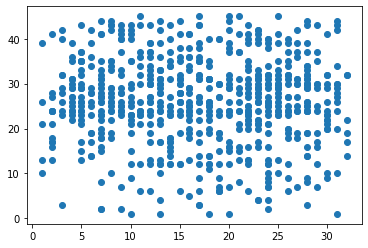

In [87]:
plt.scatter(real,pred)

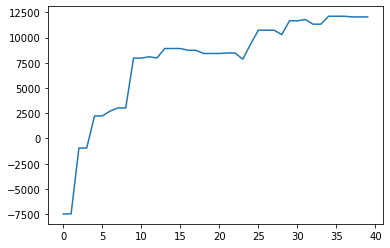

In [98]:
X = loadBalancer.X[-100,:]
X
pred = []
for n  in range(0,40):
    X_ = np.append(X[:-1], n)
    rewardHat = loadBalancer.model.predict(X_[None,:])[0]
    pred.append(rewardHat)

plt.plot(range(0,40), pred)

(array([944703., 900578., 927633., 868149., 857847., 945178., 883013.,
        803338., 877463., 835309.]),
 array([1.28476523e+00, 8.64011529e+04, 1.72801021e+05, 2.59200889e+05,
        3.45600757e+05, 4.32000625e+05, 5.18400493e+05, 6.04800362e+05,
        6.91200230e+05, 7.77600098e+05, 8.63999966e+05]),
 <a list of 10 Patch objects>)

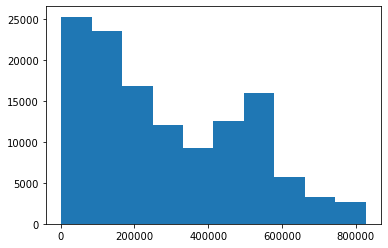

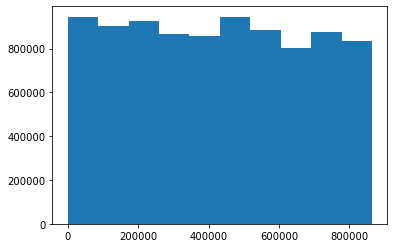

In [59]:
plt.hist(env.logTime['requestCancelled'])
plt.figure()
plt.hist(env.logTime['requestProcessed'])

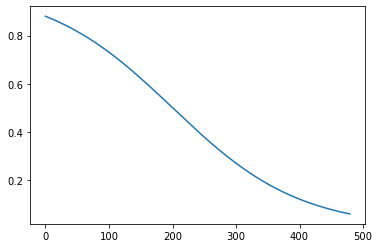

In [63]:
plt.plot(env.log['eta'])

In [ ]:
df = pd.DataFrame(loadBalancer.X[:-1])
df['reward'] = loadBalancer.y
sns.pairplot(df)

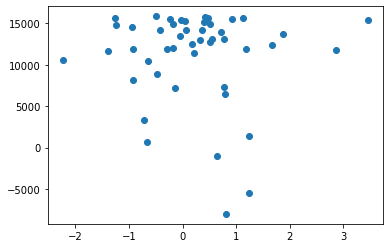

In [125]:
plt.scatter(loadBalancer.X[1:,0],loadBalancer.y)

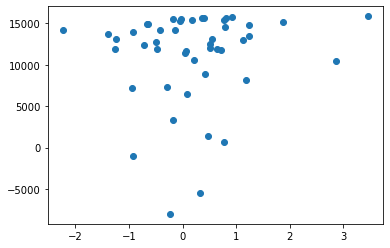

In [138]:
plt.scatter(loadBalancer.X[:-1,0], env.log['reward'][1:])